## Update Showcase Chart

In [1]:
import yfinance as yf

from pathlib import Path

from mplchart.chart import Chart

from mplchart.primitives import Candlesticks, Volume, TradeMarker, TradeSpan
from mplchart.indicators import SMA, EMA, RSI, MACD

from matplotlib_inline.backend_inline import set_matplotlib_formats

set_matplotlib_formats('svg')

root = Path.cwd().parent


In [2]:
ticker = 'AAPL'
prices = yf.Ticker(ticker).history('5y')
prices

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-10-25 00:00:00-04:00,52.127046,53.005766,51.897188,52.627460,119423200,0.0,0.0
2018-10-26 00:00:00-04:00,51.693672,52.720844,50.920303,51.789448,189033600,0.0,0.0
2018-10-29 00:00:00-04:00,52.481410,52.601127,49.344831,50.817348,183742000,0.0,0.0
2018-10-30 00:00:00-04:00,50.556368,51.521284,50.106235,51.071152,146640000,0.0,0.0
2018-10-31 00:00:00-04:00,51.928324,52.783099,51.866069,52.402401,153435600,0.0,0.0
...,...,...,...,...,...,...,...
2023-10-19 00:00:00-04:00,176.039993,177.839996,175.190002,175.460007,59302900,0.0,0.0
2023-10-20 00:00:00-04:00,175.309998,175.419998,172.639999,172.880005,64189300,0.0,0.0
2023-10-23 00:00:00-04:00,170.910004,174.009995,169.929993,173.000000,55980100,0.0,0.0


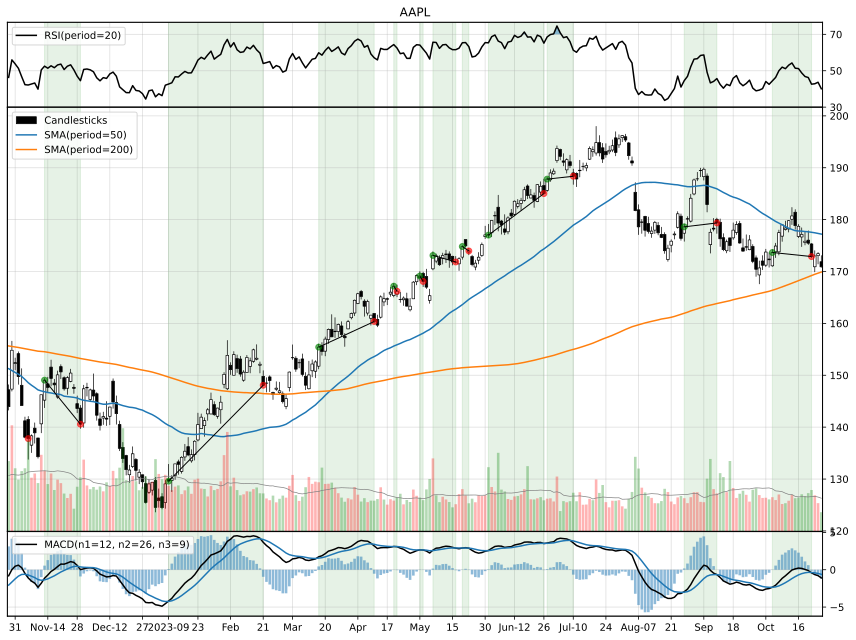

In [3]:
max_bars = 250

indicators = [
    Candlesticks(use_bars=False), SMA(50), SMA(200), Volume(),
    RSI(), MACD(), TradeMarker(), TradeSpan()
]

chart = Chart(title=ticker, max_bars=max_bars)
chart.plot(prices, indicators)



In [4]:
showcase = root.joinpath("output/showcase.svg")

data = chart.render('svg')

print(f"Updating {showcase.name} ...")

showcase.write_bytes(data)


Updating showcase.svg ...


296791